In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [42]:
# ner best run
ner_data = open('telem565047.txt','rt')
ner_list = list(ner_data)
print(ner_list[:5])
ner_data.close()

pos_data = open('telem713357.txt','rt')
pos_list = list(pos_data)
print(pos_list[:5])
pos_data.close()



['./WordBindings.py 0.18 15 1 0.02\n', 'iterations\taccuracy\tavg_loss\tsecs_per_1000\n', '20000\t0.339881436708\t0.625134993901\t0.2109375\n', '40000\t0.457747297454\t0.561557215865\t0.22890625\n', '60000\t0.573520864815\t0.523037654252\t0.2234375\n']
['./WordBindings.py 0.15 400 1\n', 'iterations\taccuracy\tavg_loss\tsecs_per_1000\n', '20000\t0.849944663701\t0.900889198869\t0.3703125\n', '40000\t0.882979389839\t0.69221594273\t0.67265625\n', '60000\t0.897366827455\t0.601803308665\t0.5609375\n']


In [43]:
from collections import namedtuple
tele_tuple = namedtuple('tele',['iterations','accuracy','avg_loss','secs_per_1000'])

ner_tuples = [tele_tuple(*map(float,row.split('\t'))) for row in ner_list[2:]]

pos_tuples = [tele_tuple(*map(float,row.split('\t'))) for row in pos_list[2:]]


In [9]:
ner_tuples[:4]

[tele(iterations=20000.0, accuracy=0.339881436708, avg_loss=0.625134993901, secs_per_1000=0.2109375),
 tele(iterations=40000.0, accuracy=0.457747297454, avg_loss=0.561557215865, secs_per_1000=0.22890625),
 tele(iterations=60000.0, accuracy=0.573520864815, avg_loss=0.523037654252, secs_per_1000=0.2234375),
 tele(iterations=80000.0, accuracy=0.533069859351, avg_loss=0.495660363778, secs_per_1000=0.228125)]

In [76]:
# graph ner data
ner_x = np.array([t.iterations for t in ner_tuples])
ner_acc = np.array([t.accuracy for t in ner_tuples])
ner_loss = np.array([t.avg_loss for t in ner_tuples])


incr = 0
curr_val = [ner_x[0]]
for i in range(0,ner_x.shape[0]-1):
    curr_val.append(ner_x[i+1])
    if curr_val[1] < curr_val[0]:
        incr = incr+220000
    ner_x[i+1] = ner_x[i+1] + incr
    curr_val.pop(0)

In [77]:
# graph pos data
pos_x = np.array([t.iterations for t in pos_tuples])
pos_acc = np.array([t.accuracy for t in pos_tuples])
pos_loss = np.array([t.avg_loss for t in pos_tuples])

incr = 0
curr_val = [pos_x[0]]
for i in range(0,pos_x.shape[0]-1):
    curr_val.append(pos_x[i+1])
    if curr_val[1] < curr_val[0]:
        incr = incr+920000
    pos_x[i+1] = pos_x[i+1] + incr
    curr_val.pop(0)

Text(0, 0.5, '% correct label')

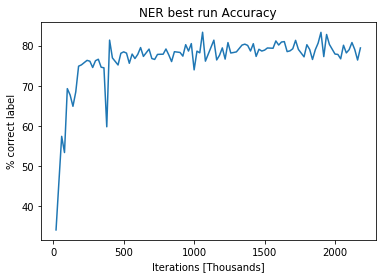

In [78]:
fig = plt.figure()
plt.plot(ner_x/1000, 100*ner_acc)
plt.title("NER best run Accuracy")
plt.xlabel("Iterations [Thousands]")
plt.ylabel("% correct label")


Text(0, 0.5, 'Avg. Negative Log-Loss')

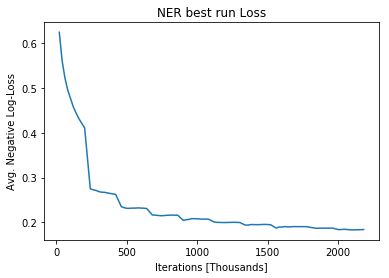

In [79]:
fig = plt.figure()
plt.plot(ner_x/1000, ner_loss)
plt.title("NER best run Loss")
plt.xlabel("Iterations [Thousands]")
plt.ylabel("Avg. Negative Log-Loss")


Text(0, 0.5, '% correct label')

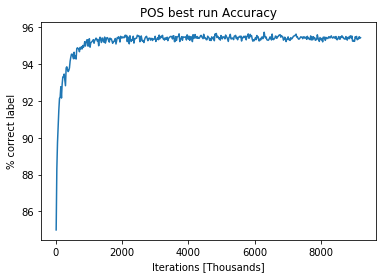

In [80]:
fig = plt.figure()
plt.plot(pos_x/1e3, 100*pos_acc)
plt.title("POS best run Accuracy")
plt.xlabel("Iterations [Thousands]")
plt.ylabel("% correct label")


Text(0, 0.5, 'Avg. Negative Log-Loss')

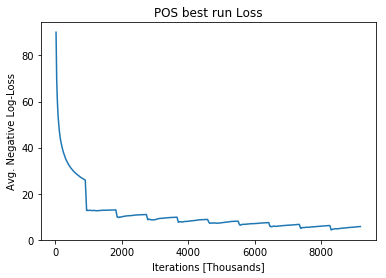

In [81]:
fig = plt.figure()
plt.plot(pos_x/1e3, 100*pos_loss)
plt.title("POS best run Loss")
plt.xlabel("Iterations [Thousands]")
plt.ylabel("Avg. Negative Log-Loss")


In [26]:
from matplotlib import __version__
__version__

'3.0.0'

In [82]:
np.diff(ner_x)


array([20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 40000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 40000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 40000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 40000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 40000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 40000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 40000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 40000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 40000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000.])